In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install imblearn

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from imblearn.datasets import make_imbalance

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris_data=load_iris()
X=iris_data.data
y=iris_data.target

In [7]:
X_imbalanced, y_imbalanced=make_imbalance(X,y,sampling_strategy={
    0:10,
    1:20,
    2:30
})

In [8]:
np.unique(y_imbalanced,return_counts=True)

(array([0, 1, 2]), array([10, 20, 30]))

In [9]:
smote=SMOTE()

In [10]:
X_balanced,y_balanced=smote.fit_resample(X_imbalanced,y_imbalanced)

In [11]:
np.unique(y_balanced,return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

# Classification

In [12]:
import seaborn as sns

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('../dataset for Python/Social_Network_Ads.csv')

In [17]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
152,15699247,Male,31,76000,0
0,15624510,Male,19,19000,0
198,15745083,Male,26,80000,0
203,15809347,Female,41,71000,0
301,15678201,Male,48,74000,1


In [18]:
data.drop(['User ID'], axis=1, inplace=True)

/Users/sauravlamichhane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

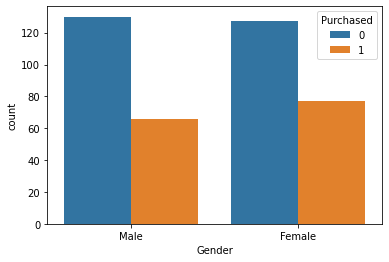

In [19]:
sns.countplot('Gender',data=data, hue='Purchased')

In [20]:
data.drop(['Gender'], axis=1, inplace=True)

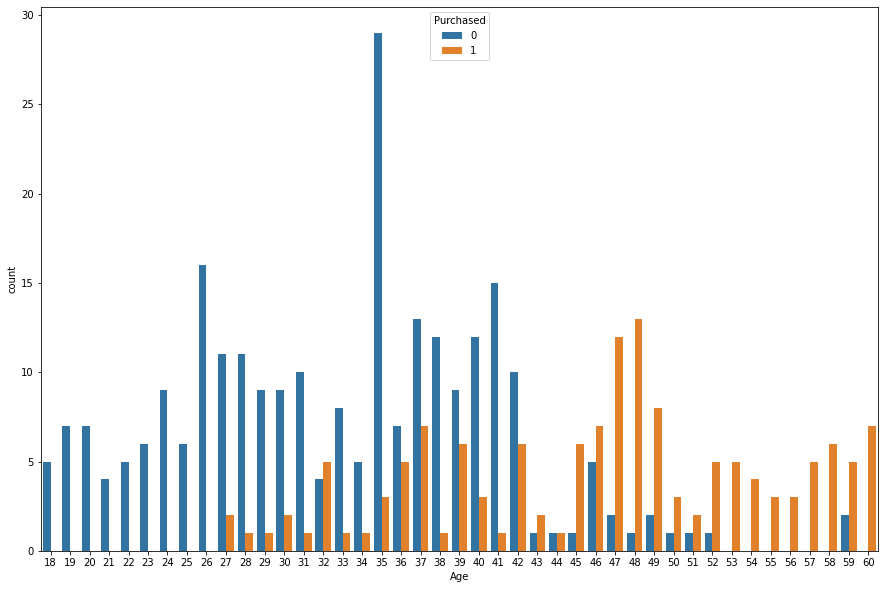

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x='Age', data=data, hue='Purchased')
plt.show()

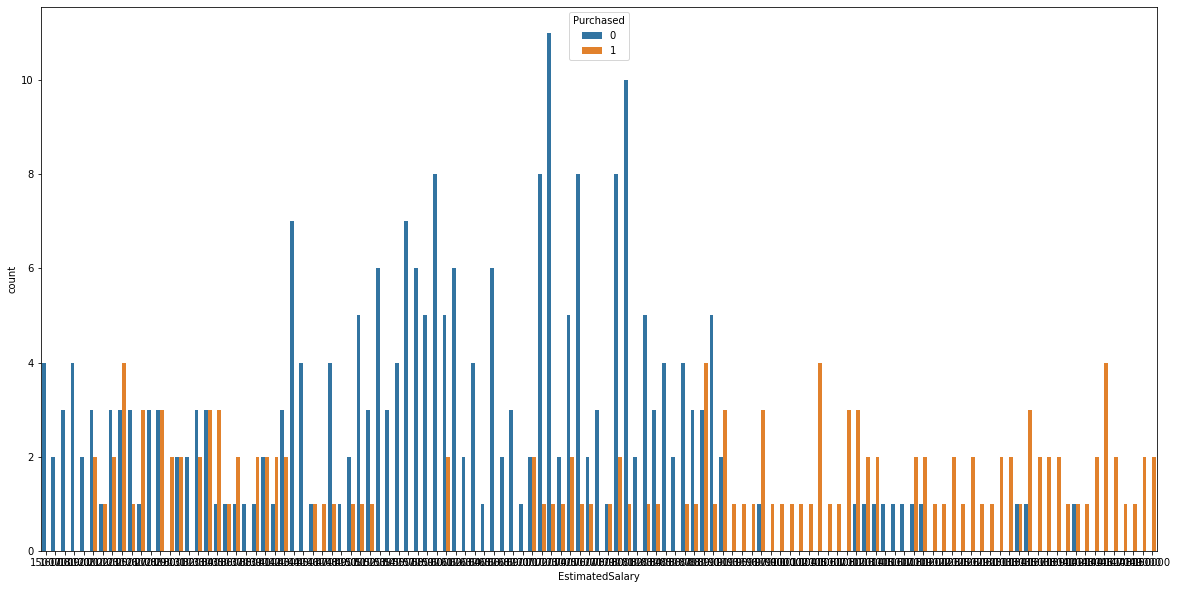

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='EstimatedSalary', data=data, hue='Purchased')
plt.show()

In [23]:
y=data['Purchased']
X=data[['Age','EstimatedSalary']]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=45,stratify=y)

In [25]:
scaler=StandardScaler()

In [26]:
scaler.fit_transform(X_train)

array([[-1.16675176,  0.31696931],
       [ 0.66913093, -1.2780306 ],
       [ 0.86238174, -0.65775286],
       [-0.78025014,  1.38030259],
       [ 0.47588012,  1.88243219],
       [-0.10387231,  2.20733958],
       [ 0.95900714,  1.91196923],
       [-0.97350095, -0.42145657],
       [ 0.37925471,  1.1440063 ],
       [ 0.28262931, -0.18516029],
       [-0.10387231, -0.48053065],
       [ 1.53875957,  1.1440063 ],
       [ 1.05563255, -0.12608622],
       [ 0.28262931,  0.05113599],
       [-1.45662798, -0.09654918],
       [-0.29712312,  0.81909891],
       [ 0.1860039 , -0.65775286],
       [ 0.28262931,  0.08067303],
       [-0.58699933,  2.38456179],
       [-0.87687555, -0.65775286],
       [-0.10387231,  2.26641365],
       [ 1.53875957, -1.2780306 ],
       [-1.16675176, -1.10080839],
       [-0.68362474, -0.09654918],
       [ 1.24888336,  2.26641365],
       [ 2.02188659, -0.80543804],
       [ 0.76575633, -1.39617874],
       [-0.29712312, -0.42145657],
       [-1.55325338,

In [27]:
logistic_regression=LogisticRegression(n_jobs=-1)

In [28]:
logistic_regression.fit(X_train,y_train)

LogisticRegression(n_jobs=-1)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
y_pred=logistic_regression.predict(X_test)

/Users/sauravlamichhane/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
y_pred_proba=logistic_regression.predict_proba(X_test)

/Users/sauravlamichhane/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
y_pred[:5]

array([1, 0, 1, 1, 0])

In [33]:
y_pred_proba[:5]

array([[0.49999904, 0.50000096],
       [0.50000017, 0.49999983],
       [0.49999899, 0.50000101],
       [0.49999919, 0.50000081],
       [0.50000134, 0.49999866]])

In [34]:
np.unique(y, return_counts=True)

(array([0, 1]), array([257, 143]))

In [35]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.35

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.37      0.42        51
           1       0.22      0.31      0.26        29

    accuracy                           0.35        80
   macro avg       0.35      0.34      0.34        80
weighted avg       0.39      0.35      0.36        80



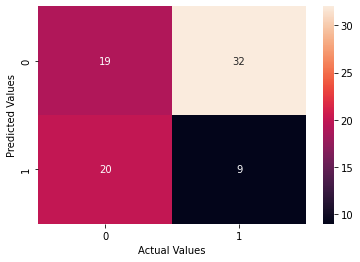

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# New Dataset

In [39]:
data = pd.read_csv('../dataset for Python/dataset_bank.csv')

In [40]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [41]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
col_to_drop=['RowNumber','CustomerId','Surname']
data.drop(col_to_drop,axis=1,inplace=True)

In [43]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
sns.pairplot(data,hue='Exited')
plt.show()